<a href="https://colab.research.google.com/github/ishaan1212/hand_digit_recog/blob/main/hand_digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model
np.random.seed(0)
(X_train, y_train), (X_test, y_test)= mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


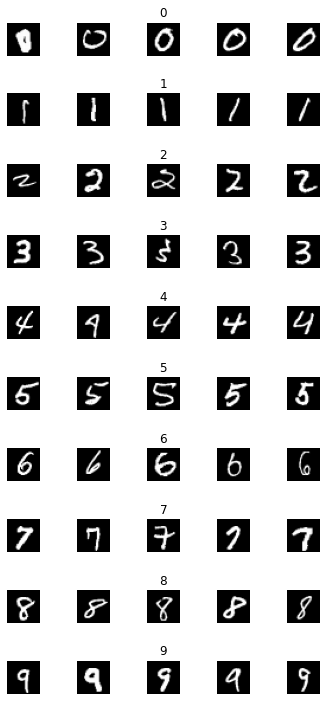

In [ ]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)

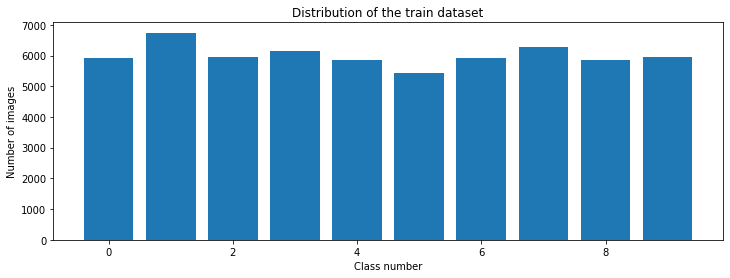

In [ ]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [ ]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)


Epoch 1/10
135/135 [==============================] - 13s 19ms/step - loss: 0.2111 - accuracy: 0.9323 - val_loss: 0.0594 - val_accuracy: 0.9823
Epoch 2/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0417 - val_accuracy: 0.9875
Epoch 3/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0388 - val_accuracy: 0.9900
Epoch 4/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0336 - val_accuracy: 0.9913
Epoch 5/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0348 - val_accuracy: 0.9903
Epoch 6/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 7/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0368 - val_accuracy: 0.991

Text(0.5, 0, 'epoch')

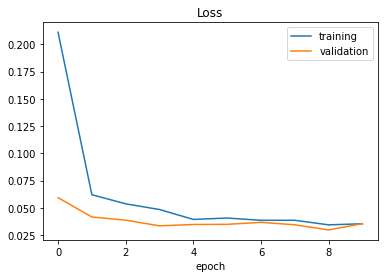

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')


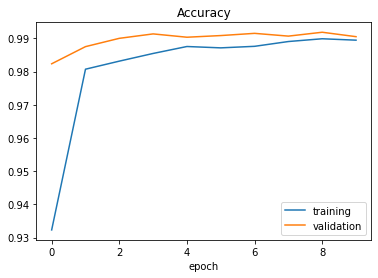

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test, y_test, verbose=0)


In [ ]:

print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.032072219997644424
Test accuracy: 0.989799976348877


PREDICTING NUMBER FROM INTERNET

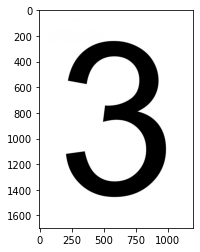

In [ ]:

#predict internet number
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


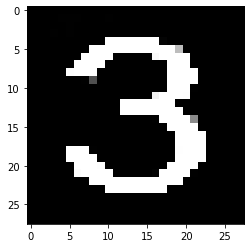

In [ ]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:

img = img/255
img = img.reshape(1,28,28,1)

In [ ]:
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(model.predict(img)))

(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [[1.4404528e-27 2.1964202e-19 8.8900258e-13 1.0000000e+00 2.6125104e-23
  1.8919871e-13 2.0761730e-22 1.5649974e-14 2.4954077e-14 5.0488024e-17]]


In [ ]:

layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

In [ ]:

print(visual_layer1.shape)
print(visual_layer2.shape)


(1, 24, 24, 30)
(1, 10, 10, 15)


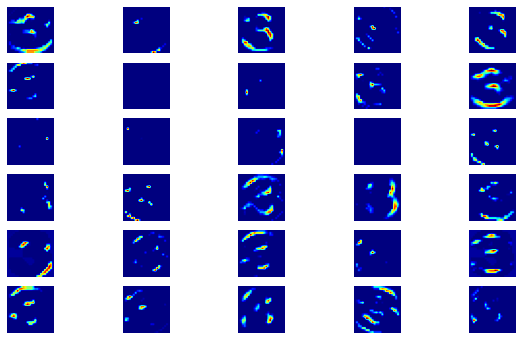

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

LAYER 2

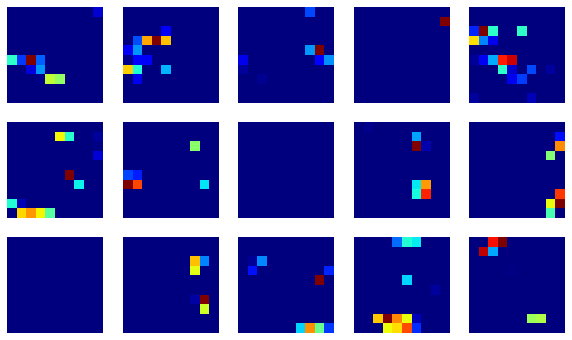

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')